In [2]:
import pyodbc
import pandas as pd

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Query = '''
select
		Y18.Department_Description
		,Y12.Salary/1000000 as _2012
		,Y13.Salary/1000000 as _2013
		,Y14.Salary/1000000 as _2014
		,Y15.Salary/1000000 as _2015
		,Y16.Salary/1000000 as _2016
		,Y17.Salary/1000000 as _2017
		,Y18.Salary/1000000 as _2018
		
	from (select [Department_Description]  --subselect groups departments that existed in the 2018 dataset
		  ,sum([Salary]) as Salary
		  from [dbo].[ASU Employee Salary Data - 2018]
		  group by [Department_Description]) as Y18
		
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2012]
		             group by [Department_Description]) as Y12 
					 on Y12.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2013]
		             group by [Department_Description]) as Y13
					 on Y13.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2014]
		             group by [Department_Description]) as Y14 
					 on Y14.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2015]
		             group by [Department_Description]) as Y15
					 on Y15.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2016]
		             group by [Department_Description]) as Y16
					 on Y16.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2017]
		             group by [Department_Description]) as Y17
					 on Y17.[Department_Description] = Y18.[Department_Description]

	order by Y18.Salary desc

  '''
# save the sql query to a pandas dataframe
ASU_Dept_Data = pd.read_sql(ASU_Dept_Query, connection)
connection.close()
ASU_Dept_Data.head()

,Department_Description,_2012,_2013,_2014,_2015,_2016,_2017,_2018
0,SDA Administration,15.2781,16.3588,19.4425,21.2002,24.2752,23.2735,24.1613
1,School Of Earth & Space Explor,8.5169,10.0988,11.1384,11.1434,12.2868,12.4024,14.6135
2,Sch Elect Comptr & Energy Engr,9.7694,10.3102,10.3109,11.8311,12.4207,12.6697,13.8897
3,College Of Law,11.4501,11.2978,12.2626,12.1937,12.8743,12.7132,13.4206
4,Sols Administration & Faculty,11.8561,12.2137,12.6630,12.4115,12.0296,12.0518,13.2895


#### Transpose dataframe and graph top 7 ASU departments by salary spending.  SDA Administration is in a league of its own.

In [10]:
# misc cleaning
ASU_Dept_Data_Trans = ASU_Dept_Data.set_index('Department_Description').transpose() #rotate years to be the index
ASU_Dept_Data_Trans.index = ASU_Dept_Data_Trans.index.str.replace('_','') #remove underscore from attribute 'years' these were necessary to perform the SQL query
ASU_Dept_Data_Trans.head()

Department_Description,SDA Administration,School Of Earth & Space Explor,Sch Elect Comptr & Energy Engr,College Of Law,Sols Administration & Faculty,Sch Compt Infor & Dec Sys Engr,Sch Engr Matter Trnsprt Energy,School of Math & Stat Sciences,English,Psychology,...,ASUHS Operations Lead,MTBI,ASUP Police Department,"Noble Lib Serv, Govt Info",University Staff Council,SDA Aquatic Complex,AISSS West,Program Metabolic Biology,DPC Information Desk,Rocky Mountain Math Consortium
2012,15.2781,8.5169,9.7694,11.4501,11.8561,8.1784,8.3544,8.4359,8.8071,7.9207,...,0.3216,0.0374,0.0358,0.5846,0.0234,0.0300,0.0195,0.2571,0.0150,0.0198
2013,16.3588,10.0988,10.3102,11.2978,12.2137,8.9291,8.7624,9.2727,9.5977,9.2850,...,0.3317,0.0383,0.0376,0.6499,0.0241,0.0307,0.0201,0.2014,0.0156,0.0198
2014,19.4425,11.1384,10.3109,12.2626,12.6630,9.9195,10.2322,9.4554,10.5326,9.7961,...,0.1857,0.0397,0.0387,0.5574,0.0247,0.0313,0.0253,0.2048,0.0193,0.0203
2015,21.2002,11.1434,11.8311,12.1937,12.4115,10.0621,10.3152,10.1713,10.8944,8.9437,...,0.1452,0.0397,0.0387,0.5862,0.0247,0.0313,0.0529,0.0907,0.0193,0.0203
2016,24.2752,12.2868,12.4207,12.8743,12.0296,10.3261,11.1591,10.6488,11.1700,9.0830,...,0.1918,0.0360,0.0394,0.5294,0.0336,0.0323,0.0268,0.0927,0.0224,0.0210


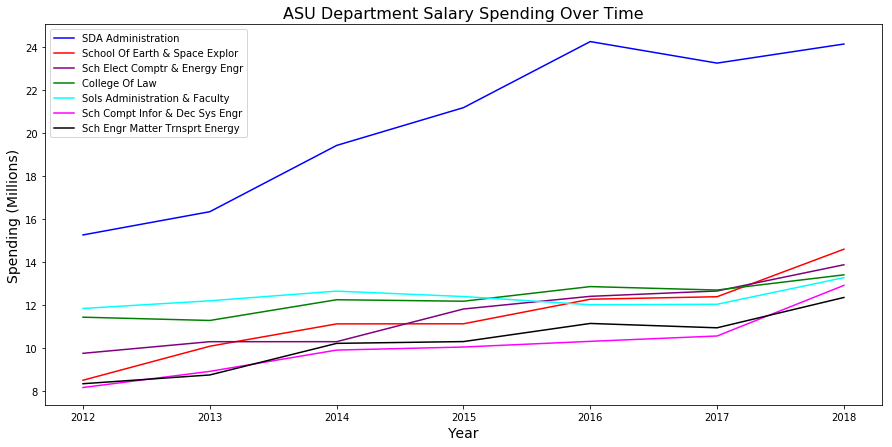

In [9]:
#plot the top 7 ASU departments by salary spending
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("ASU Department Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

y1 = ASU_Dept_Data_Trans.iloc[:,0]
y2 = ASU_Dept_Data_Trans.iloc[:,1]
y3 = ASU_Dept_Data_Trans.iloc[:,2]
y4 = ASU_Dept_Data_Trans.iloc[:,3]
y5 = ASU_Dept_Data_Trans.iloc[:,4]
y6 = ASU_Dept_Data_Trans.iloc[:,5]
y7 = ASU_Dept_Data_Trans.iloc[:,6]

x = ASU_Dept_Data_Trans.index

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='purple')
plt.plot(x, y4, color='green')
plt.plot(x, y5, color='cyan')
plt.plot(x, y6, color='magenta')
plt.plot(x, y7, color='black')
plt.legend()

# by a significant margin, SDA Administration (Sun Devil Athletics) spends much more on salary than other departments
# College of Law has remained relatively stable over time, as it has recently been passed up by 
# School of Earth and Space Exploration & School of Electrical Computation and Energy Engineering
# This seems to indicate ASU is moveing in a more distinct STEM direction

In [19]:
# rather than using the enormous query above, simply grab the data and do the same thing using just python

import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Query = '''
select * from [dbo].[ASU Employee Salary Data - 2012]
union
select * from [dbo].[ASU Employee Salary Data - 2013]
union
select * from [dbo].[ASU Employee Salary Data - 2014]
union
select * from [dbo].[ASU Employee Salary Data - 2015]
union
select * from [dbo].[ASU Employee Salary Data - 2016]
union
select * from [dbo].[ASU Employee Salary Data - 2017]
union
select * from [dbo].[ASU Employee Salary Data - 2018]
  '''
# save the sql query to a pandas dataframe
asu_dept_data_long = pd.read_sql(ASU_Dept_Query, connection)
connection.close()

asu_dept_data_long.head()

,Calendar_Year,Full_Name,Job_Description,Department_Description,Salary,FTE
0,2012,"Aarestad,Barbara",Coordinator,Career Preparation,41000.00,1.0
1,2012,"Abbas,James",Assoc Professor,Sch Biological & Hlth Sys Engr,96936.00,1.0
2,2012,"Abbaszadegan,Morteza",Professor,Sch Sustain Engr & Built Envrn,125413.00,1.0
3,2012,"Abbe,Scott",Tech Support Analyst Coord,Engineering Technical Services,78838.05,1.0
4,2012,"Abbey,Craig",Director,EVPP Consultant Group,52000.00,0.5


In [78]:
asu_dept_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71453 entries, 0 to 71452
Data columns (total 6 columns):
Calendar_Year             71453 non-null int64
Full_Name                 71453 non-null object
Job_Description           71453 non-null object
Department_Description    71453 non-null object
Salary                    71453 non-null float64
FTE                       71453 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.3+ MB


Text(0, 0.5, 'Spending (Millions)')

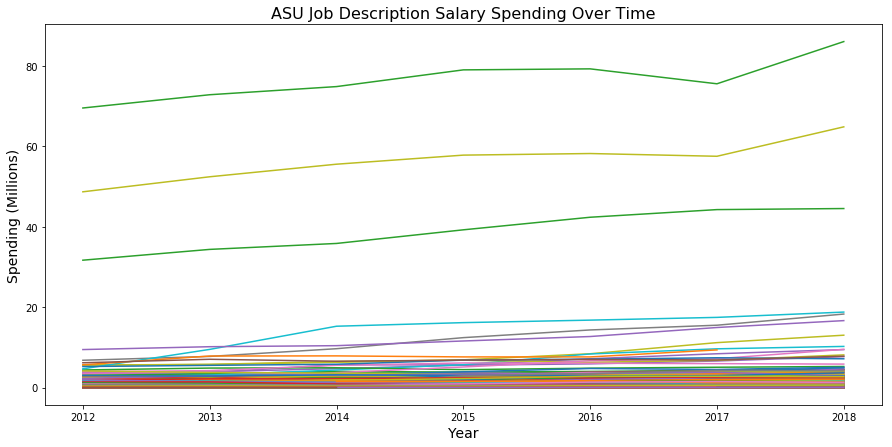

In [79]:
asu_job_group = asu_dept_data_long.groupby(['Calendar_Year', 'Job_Description'])['Salary'].sum().unstack()
asu_job_group = asu_job_group/1000000

fig, ax = plt.subplots(figsize=(15,7))
asu_job_group.plot(ax=ax)
ax.get_legend().remove()

plt.title("ASU Job Description Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

In [129]:
# this isn't working right
top8 = [
    
'Professor',   
'Assoc Professor',
'Asst Professor',
'Instructor',
'Lecturer',
'Director',
'Academic Success Specialist',
'Regents Professor'

    ]

top_salary_positions = asu_dept_data_long[asu_dept_data_long['Job_Description'].str.contains('|'.join(top8))]
top_salary_positions.shape

(26285, 6)

In [128]:
top_salary_positions.groupby(['Calendar_Year', 'Job_Description'])['Salary'].sum().unstack()
# I should only be getting 8 columns here

Job_Description,A W Snell Professor Ed Pol Std,Academic Success Specialist,Academic Svcs Mgr + Lecturer,Art Director,"Art Director, KAET",Asc Dean & Asc Professor ACD,Asc Dean (ACD) & Asc Professor,Asc Dir & Asc Professor,Asc Dir (ACD) & Asc Professor,Asc Dir (FSC) & Asc Professor,...,Vice President & Professor,Vice Provost & Assoc Professor,Vice Provost & Professor,Vice Provost/Dean & Professor,Visiting Assoc Professor,Visiting Asst Professor,Visiting Clin Asst Professor,Visiting Professor,Visiting Professor FSC,Visiting Professor Research
Calendar_Year,,,,,,,,,,,,,,,,,,,,,
2012,144858.0,5568107.29,NaN,54047.00,62575.71,NaN,NaN,67564.88,NaN,194302.82,...,NaN,159666.0,200000.00,1387814.00,120000.0,1158000.00,NaN,180000.00,NaN,50000.0
2013,NaN,5730067.34,NaN,55668.41,62575.71,94500.00,NaN,70943.12,NaN,205949.00,...,NaN,NaN,806687.32,1410306.56,NaN,1001000.00,NaN,264171.36,NaN,NaN
2014,NaN,6275054.55,52500.0,56781.78,NaN,NaN,NaN,64179.16,NaN,134249.00,...,NaN,355265.0,446800.00,848791.72,NaN,451850.00,NaN,223000.00,NaN,NaN
2015,NaN,6884320.20,NaN,207000.00,NaN,NaN,NaN,64179.16,NaN,134249.00,...,NaN,232265.0,506812.57,548791.72,NaN,249450.00,NaN,570000.00,NaN,NaN
2016,NaN,8398904.28,NaN,162500.00,NaN,79036.14,NaN,68679.16,NaN,138249.00,...,NaN,238265.0,514327.01,576109.61,NaN,331145.13,57100.0,354000.00,NaN,NaN
2017,NaN,11161275.00,NaN,273295.00,NaN,82636.00,NaN,NaN,NaN,247831.00,...,NaN,255000.0,697741.00,590110.00,30000.0,70000.00,NaN,NaN,NaN,NaN
2018,NaN,13007854.13,NaN,340514.23,NaN,NaN,360871.14,NaN,277550.28,NaN,...,275000.0,262500.0,711240.27,649500.00,NaN,70000.00,NaN,140000.00,118045.0,NaN


In [22]:
asu_dept_group = asu_dept_data_long.groupby(['Calendar_Year', 'Department_Description'])['Salary'].sum().unstack()

asu_dept_group.shape

(7, 1321)

In [26]:
asu_dept_group_no_na = asu_dept_group.dropna(axis='columns')

asu_dept_group_no_na.shape
# removing columns with NA values leaves us with only 270 columns

(7, 270)

In [40]:
asu_dept_group_no_na = asu_dept_group_no_na/1000000 # convert department amounts to millions

asu_dept_group_no_na.head()

Department_Description,AISSS West,ASUHS Acute Care,ASUHS Administration,ASUHS Clinical Leads,ASUHS Environmental Health,ASUHS Executive Team,ASUHS Financial,ASUHS Front Office,ASUHS Insurance,ASUHS Lab,...,WPC MRED,WPC Management,WPC Marketing,WPC Office of Development,WPC Seidman CAPS,WPC Seidman Research Inst,WPC Supply Chain Management,WPC UPO Academic Services,WPC UPO Administration,WPC UPO HON Carey Academy
Calendar_Year,,,,,,,,,,,,,,,,,,,,,
2012,0.019563,0.278242,0.031152,0.469385,0.027710,0.365461,0.072700,0.163900,0.092248,0.074675,...,0.180000,5.659618,3.869149,0.466607,0.684542,0.701299,4.059517,1.133663,1.353371,0.635507
2013,0.020150,0.187046,0.031775,0.584042,0.028541,0.466154,0.128621,0.098277,0.152905,0.077795,...,0.196250,5.765860,4.035949,0.479058,0.713668,0.652399,4.217460,1.329138,1.392966,0.661632
2014,0.025327,0.217914,0.064210,0.558026,0.029254,0.480776,0.239496,0.099882,0.196023,0.073902,...,0.202138,6.310832,4.296054,0.436448,0.704780,0.696744,4.494384,1.439355,1.666727,0.673823
2015,0.052952,0.306597,0.032261,0.592965,0.029254,0.511921,0.236506,0.099882,0.234885,0.073902,...,0.202138,6.886085,4.367055,0.613905,0.607673,0.582512,4.177643,1.575073,1.801247,0.795423
2016,0.026827,0.389000,0.033072,0.901368,0.030129,0.693279,0.234099,0.126672,0.241242,0.076128,...,0.233946,6.604719,4.871643,0.594473,0.735886,0.695485,4.685785,1.464890,1.772907,0.853907


Text(0, 0.5, 'Spending (Millions)')

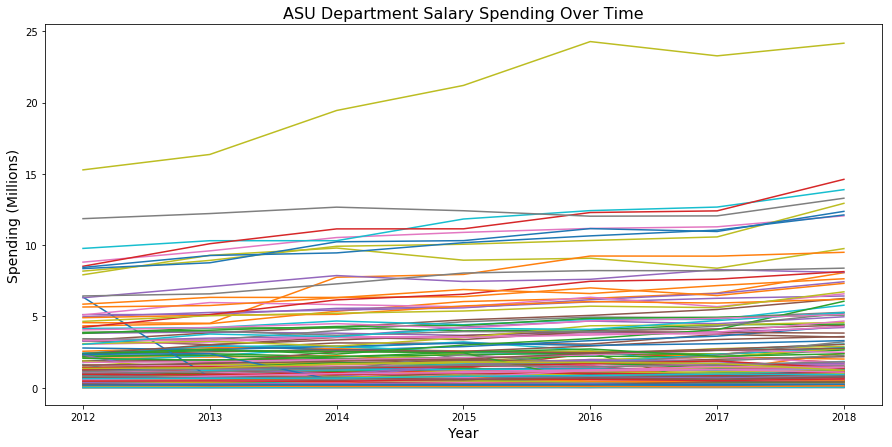

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
asu_dept_group_no_na.plot(ax=ax, title="ASU Department Salary Spending Over Time")
ax.get_legend().remove()
plt.title("ASU Department Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

# there seems to be a cluster of departments above the 7-8 Million dollar range, with the vast majority below that
# one department made the transition from that upper cluster to the lower cluster between 2014 and 2016